# Getting Started
This notebook is for a short demonstration of Python for statistics.

The notebook covers the following points:
- Generating random numbers
- Probability distributions
- Curve fitting
- Simple statistical anlysis with NetCDF files

## Import Python modules


In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.stats  as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import time
from datetime import datetime, timedelta
from pathlib import Path

## Random numbers

In [5]:
np.random.randint(0,10)     # Get a random integer in the specified range

3

In [6]:
np.random.choice([2,4,6,9]) # Get a random element from a sequence

9

In [7]:
np.random.random()          # Get a real number between 0 and 1

0.5871688096117105

In [8]:
np.random.uniform(0,10)     # Get a real in the specified range

0.7468650419306733

## Probability distributions

https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [9]:
np.random.seed(122)   # Set the seed to an arbitrary value Set the 

print([np.random.uniform(0,10) for x in range(6)])

[1.569918378916666, 7.022100424924458, 2.614782663912485, 4.517129080114671, 4.080652648079488, 6.1154121111339945]


gaussian distribution with mean = 2.0, and a standard deviation of 1.0:

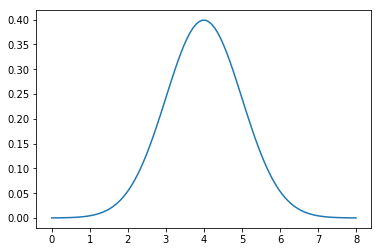

In [10]:
gaussian = stats.norm(loc=4.0, scale=1.0)
x = np.linspace(0.0, 8.0, 100)
y = gaussian.pdf(x)
plt.plot(x,y);

Cumulative distribution

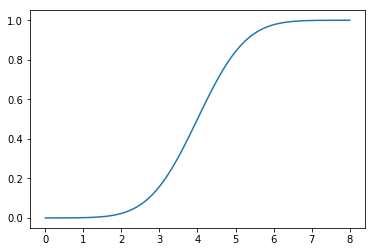

In [11]:
z = gaussian.cdf(x)
plt.plot(x,z);

For hypothesis testing, one often needs the p-value. For example, for the given gaussian distribution above, what would be the x-value so that P(X <= x) = 0.95?

In [12]:
gaussian.ppf(0.95)

5.644853626951472

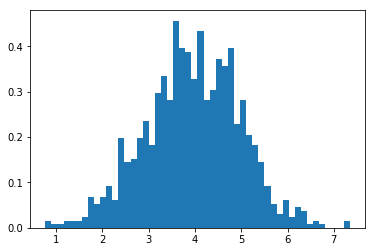

In [13]:
x = gaussian.rvs(1000);
# density --> If True, the first element of the return tuple will be the counts normalized to form a probability density,
# i.e., the area (or integral) under the histogram will sum to 1.
plt.hist(x, bins=50, density=True); 


## Curve fitting

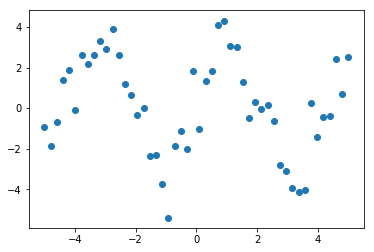

In [14]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
plt.figure(figsize=(6, 4));
plt.scatter(x_data, y_data);

In [15]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])
print(params); # param[0] and param[1] are the mean and the standard deviation

[3.05931973 1.45754553]


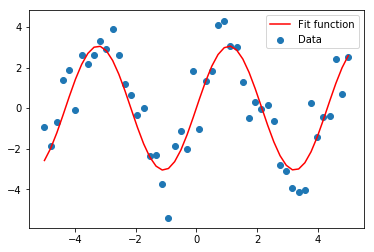

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fit function', color='r')

plt.legend(loc='best')

plt.show()

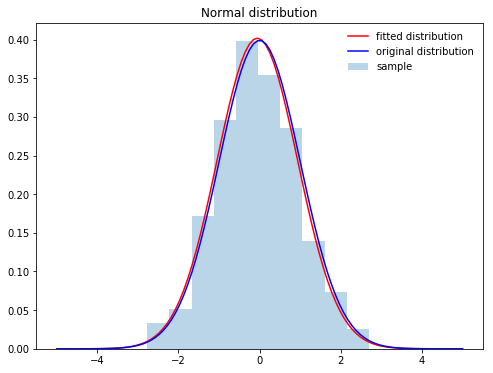

In [17]:
from scipy.stats import norm

# picking 500 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0, scale=True, size=500)  # rvs --> Random variates

param = norm.fit(samp) # distribution fitting

# generate 100 numbers between -5 and 5
x = np.linspace(-5,5,100)

# fitted distribution
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

# original distribution
pdf = norm.pdf(x)

plt.figure(figsize=(8, 6))
plt.title('Normal distribution')
plt.plot(x, pdf_fitted, 'r-', label='fitted distribution')
plt.plot(x, pdf, 'b-', label='original distribution')
plt.hist(samp, density=True, alpha=.3, label='sample')
plt.legend(loc='best', frameon=False)
plt.show()

# Exploring NetCDF data

In [18]:
import netCDF4

## List available datasets

In [19]:
!ls ../data/*.nc

../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_203012-205511.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_205512-208011.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_208012-209911.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_208012-209912.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_209912-212411.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_212412-214911.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_214912-217411.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_217412-219911.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_219912-222411.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_222412-224911.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_224912-227411.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_227412-229911.nc
../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_229912-229912.nc
../data/sic_OImon_MPI-ESM-LR_rcp85_r1i1p1_200601-210012.nc


# Read dataset

In [20]:
input_directory = Path("../data")
input_file = input_directory / "pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc"
dataset = netCDF4.Dataset(input_file, "r")

In [21]:
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

# Discover the data

### Use **Precipitation** variable

``` python
pr   --> dataset['pr'][:]

lat  --> dataset['lat'][:]

lon  --> dataset['lon'][:]

time --> get_dates(dataset)
```

In [22]:
pr   = dataset['pr'][:]
lat  = dataset['lat'][:]
lon  = dataset['lon'][:]
time = get_dates(dataset)

In [23]:
print(time[0])

2003-11-11 00:00:00


In [24]:
print(time.shape)

(300,)


In [25]:
print(lat.shape)

(145,)


In [26]:
print(lon.shape)

(192,)


In [27]:
input_file

PosixPath('../data/pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc')

In [28]:
# pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc
# 2005 December to 2030 November
print("Number of months: ", ((2030-2005))*12)
print (pr.shape, pr.size)

Number of months:  300
(300, 145, 192) 8352000


### Getting percentile values

In [29]:
print(np.percentile(pr, 99))
print(pr.max())
print(np.percentile(pr, 1))
print(pr.min())

0.00019958691496867642
0.0010691792
1.860755755700439e-08
0.0


## Plot

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [31]:
# import cartopy.crs as ccrs
# import cartopy.io.shapereader as shpreader
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Find an interesting date

In [32]:
time[178]

datetime.datetime(2018, 6, 25, 0, 0)

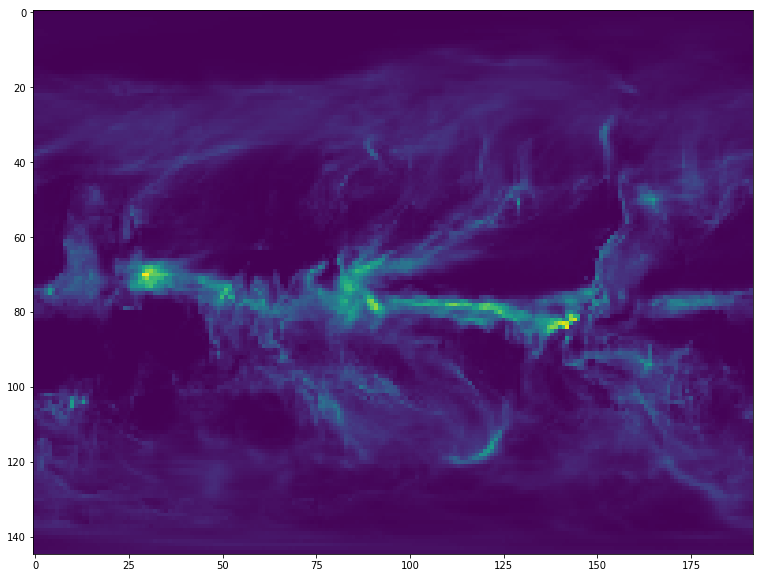

In [33]:
plt.figure(figsize=(20, 10))
plt.imshow(pr[178,:,:]);

## Fit 2D gaussian

In [34]:
np.ndim(pr[178,:,:])
#pr[178,0:5,0:5]

2

original: (3, 1, 0.5) 
fitted: [2.99607571 0.99869196 0.49719012]


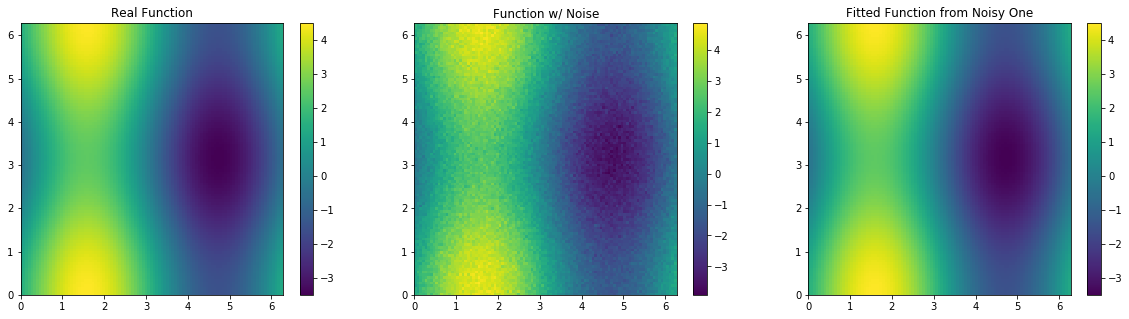

In [35]:
# curvefit with non linear least squares (curve_fit function)
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.sin(x[0])+b*np.cos(x[1])+c

limits = [0, 2*np.pi, 0, 2*np.pi]  # [x1_min, x1_max, x2_min, x2_max]
side_x = np.linspace(limits[0], limits[1], 100)
side_y = np.linspace(limits[2], limits[3], 100)
X1, X2 = np.meshgrid(side_x, side_y)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))

xdata = np.vstack((x1_1d, x2_1d))
original = (3, 1, 0.5)
z = func(xdata, *original)
Z = z.reshape(size)
z_noise = z + .2*np.random.randn(len(z))
Z_noise = z_noise.reshape(size)

ydata = z_noise
popt, pcov = curve_fit(func, xdata, ydata)
#print "original: {}\nfitted: {}".format(original, popt)
print ("original:", original, "\nfitted:", popt)
z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(size)

# Plot it
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Real Function")
plt.pcolormesh(X1, X2, Z)
plt.axis(limits)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Function w/ Noise")
plt.pcolormesh(X1, X2, Z_noise)
plt.axis(limits)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Fitted Function from Noisy One")
plt.pcolormesh(X1, X2, Z_fit)
plt.axis(limits)
plt.colorbar()

plt.show()

## Extreme cases

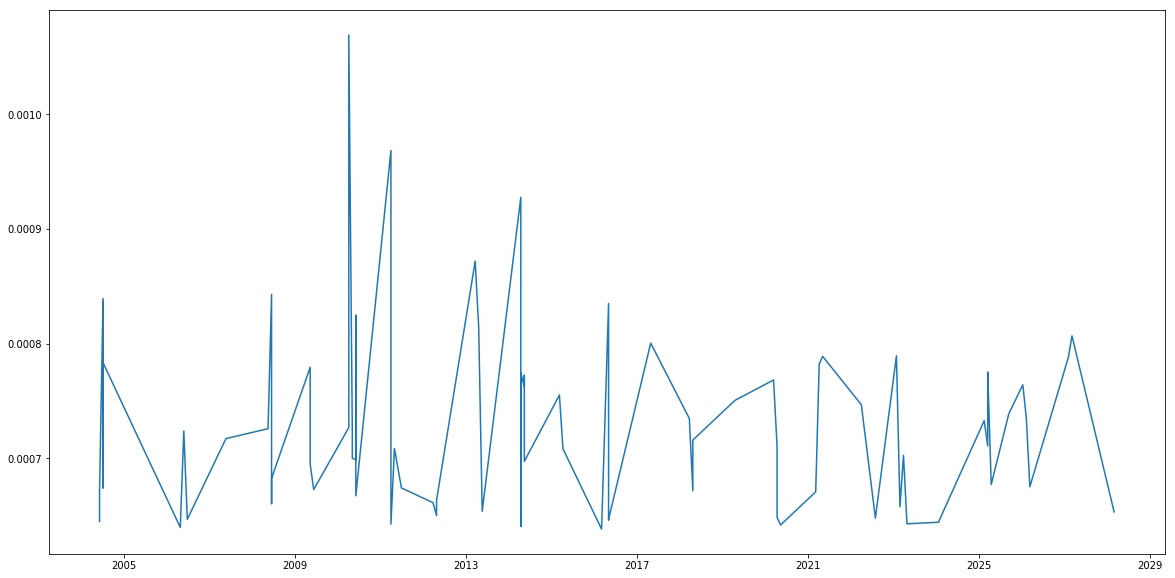

In [36]:
indices = [pr > np.percentile(pr, 99.999)]
extreme_values = pr[indices]
ind_dates = np.ma.where(pr > np.percentile(pr, 99.999))[0]

#print(ind_dates)
extreme_dates = get_dates(dataset)[ind_dates]
#print(extreme.shape)
plt.figure(figsize=(20, 10))
plt.plot(extreme_dates, extreme_values);

## Change over the years

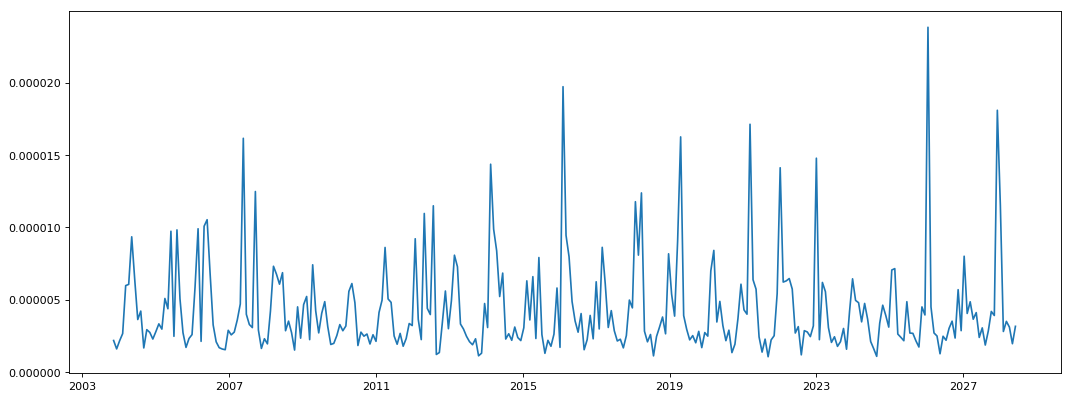

In [37]:
fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(get_dates(dataset)[:], pr[:, 50, 3])
plt.show()

# print(dataset['lat'][50])
# print(dataset['lon'][3])
# print(dataset['time'][170:190])
# print(get_dates(dataset)[170:190])

# Save and close

In [38]:
dataset.close()